<a href="https://colab.research.google.com/github/wtmdgjs/newRepository/blob/main/%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수업자료



1. 기계학습이란?
  - 데이터의 수학적 모델을 사용하여 컴퓨터가 데이터로부터 학습토록 하는 것.
  - 데이터 내의 패턴을 식별하고, 이러한 패턴을 사용하여 예측을 할 수 있는 데이터 모델을 만드는 것.

2. 기계학습의 종류 (출처: http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L5.pdf)
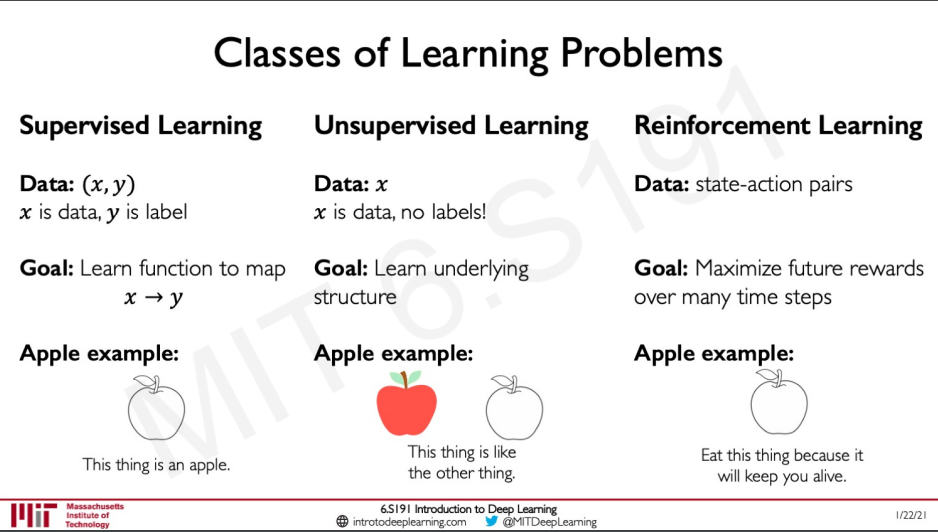

3. 기계학습은 '최적화'

  주어진 데이터로 최적의 해를 구하는 것.  
  목적함수(cost function)의 값을 최소로 하는 예측값을 찾자.

# 실습: 코드 분석

> Abstract

* Run classifiers to classify noised moons dataset  
 * Logistic Regression  
 * Stochastic Gradient Descent  
 * Decision Tree  
 * Random Forest  
 * Support Vector Machine (linear / nonlinear)  
 * Total Ensemble  
   * Voting (Hard, Soft)
   * Bagging  
   * Boosting (AdaBoost, Gradient Boosting) 

### 0. Example Code - import & get models and data:



In [19]:
'''
    Check library version. validation code
'''
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [20]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42) #For each run makes the same result

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

Trainset: (1500, 2), Testset: (1500,)


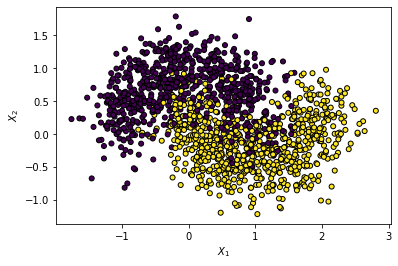

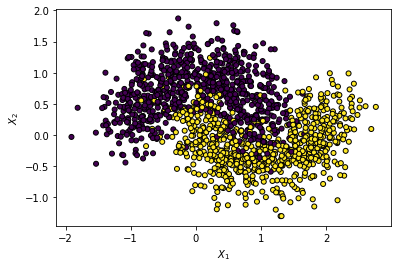

In [212]:
X, y = make_moons(n_samples=3000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Trainset: {}, Testset: {}".format(X_train.shape, y_train.shape))

plt.scatter(X_train[:, 0], X_train[:, 1], marker='.', c=y_train, s=100,
            edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, s=100,
            edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

def get_models(r_state=42, n_est=50, lr=0.1):
    models = dict()
    models['logistic-regression'] =  LogisticRegression(solver="lbfgs", random_state=r_state)
    models['GaussianNB'] = GaussianNB()
    models['sgd'] = SGDClassifier(loss="hinge", learning_rate="constant", 
                                 eta0=0.001, max_iter=10000, tol=1e-3, 
                                 random_state=r_state)
    models['dcision-tree'] = DecisionTreeClassifier(random_state=r_state)
    models['random-forest'] = RandomForestClassifier(random_state=r_state)
    models['linear-svm'] = SVC(kernel="linear", random_state=r_state)
    models['polynomial-svm'] = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=r_state))
    ])
    models['hard-vote'] = VotingClassifier(
        estimators=[('logistic-regression', models['logistic-regression']), 
                    ('sgd', models['sgd']), 
                    ('random-forest', models['random-forest']), 
                    ('polynomial-svm', models['polynomial-svm'])],
        voting='hard')
    models['soft-vote'] = VotingClassifier(
        estimators=[('logistic-regression', models['logistic-regression']),
                    ('random-forest', models['random-forest']), 
                    ("svm_clf", SVC(gamma="scale", probability=True, random_state=r_state))],
        voting='soft')
    models['Bagging'] = BaggingClassifier(
        DecisionTreeClassifier(random_state=r_state), n_estimators=n_est,
        bootstrap=True, random_state=r_state)
    models['adaBoosting'] = AdaBoostClassifier(
        DecisionTreeClassifier(random_state=r_state), n_estimators=n_est,
        algorithm="SAMME.R", learning_rate=lr, random_state=r_state)
    models['gradientBoosting'] = GradientBoostingClassifier(
        random_state=r_state)

    return models

In [25]:
from sklearn.metrics import accuracy_score
import time

def evaluate_model(model, X_train, X_test, y_train, y_test):
    start = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    elaptime = time.time() - start
    acc = accuracy_score(y_test, y_pred)
    return acc, elaptime

In [26]:
models = get_models()

results, names, times = list(), list(), list()
for name, model in models.items():
    acc, elaptime = evaluate_model(model, X_train, X_test, 
                                   y_train, y_test)
    results.append(acc)
    times.append(elaptime)
    names.append(name)
    print('%20s\t %.4f (time: %.3f)' % (name, acc, elaptime))

 logistic-regression	 0.8420 (time: 0.018)
          GaussianNB	 0.8433 (time: 0.002)
                 sgd	 0.8413 (time: 0.005)
        dcision-tree	 0.8680 (time: 0.006)
       random-forest	 0.8967 (time: 0.283)
          linear-svm	 0.8453 (time: 0.048)
      polynomial-svm	 0.8993 (time: 0.096)
           hard-vote	 0.8767 (time: 0.446)
           soft-vote	 0.9000 (time: 0.518)
             Bagging	 0.8927 (time: 0.176)
         adaBoosting	 0.8660 (time: 0.006)
    gradientBoosting	 0.9080 (time: 0.182)


In [27]:
from sklearn.ensemble import StackingClassifier

def get_stacking(models, nfold=5):
    layer0 = list()
    layer0.append(('rf', models['random-forest']))
    layer0.append(('adab', models['adaBoosting']))
    layer0.append(('grab', models['gradientBoosting']))
    layer1 = LogisticRegression()
    
    model = StackingClassifier(estimators=layer0,
                              final_estimator=layer1,
                              cv=nfold)
    return model

modelstack = dict()
modelstack['stack'] = get_stacking(models)

results, names, times = list(), list(), list()
for name, model in modelstack.items():
    acc, elaptime = evaluate_model(model, X_train, X_test, 
                                   y_train, y_test)
    results.append(acc)
    times.append(elaptime)
    names.append(name)
    print('%s\t %.4f (time: %.3f)' % (name, acc, elaptime))

stack	 0.9113 (time: 2.350)


---
# 실습: 코드 작성

* 샘플 수: 768
* 속성: 
  - pregnant: 과거 임신 횟수
  - plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도
  - pressure: 확장기 혈압
  - thickness: 삼두근 피부 주름 두께
  - insulin: 혈청 인슐린
  - BMI: 체질량 지수
  - pedigree: 당뇨병 가족력
  - age: 나이
* 클래스: 당뇨(1), 당뇨 아님(0)


> 출처: https://github.com/gilbutITbook/080228

### 0. 기본 코드 제공

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

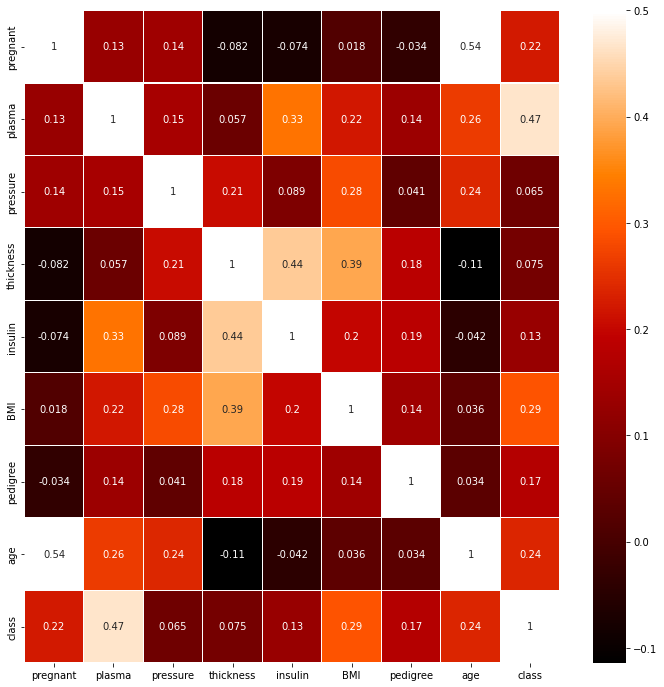

In [29]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
# 이를 위해 pandas library를 이용하여 데이터를 호출합니다.
names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"]
df = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/pima-indians-diabetes.csv', names=names)

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

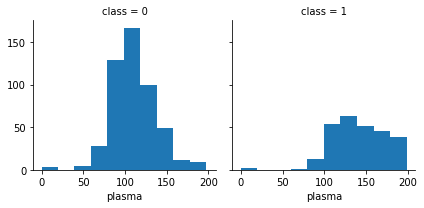

In [30]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

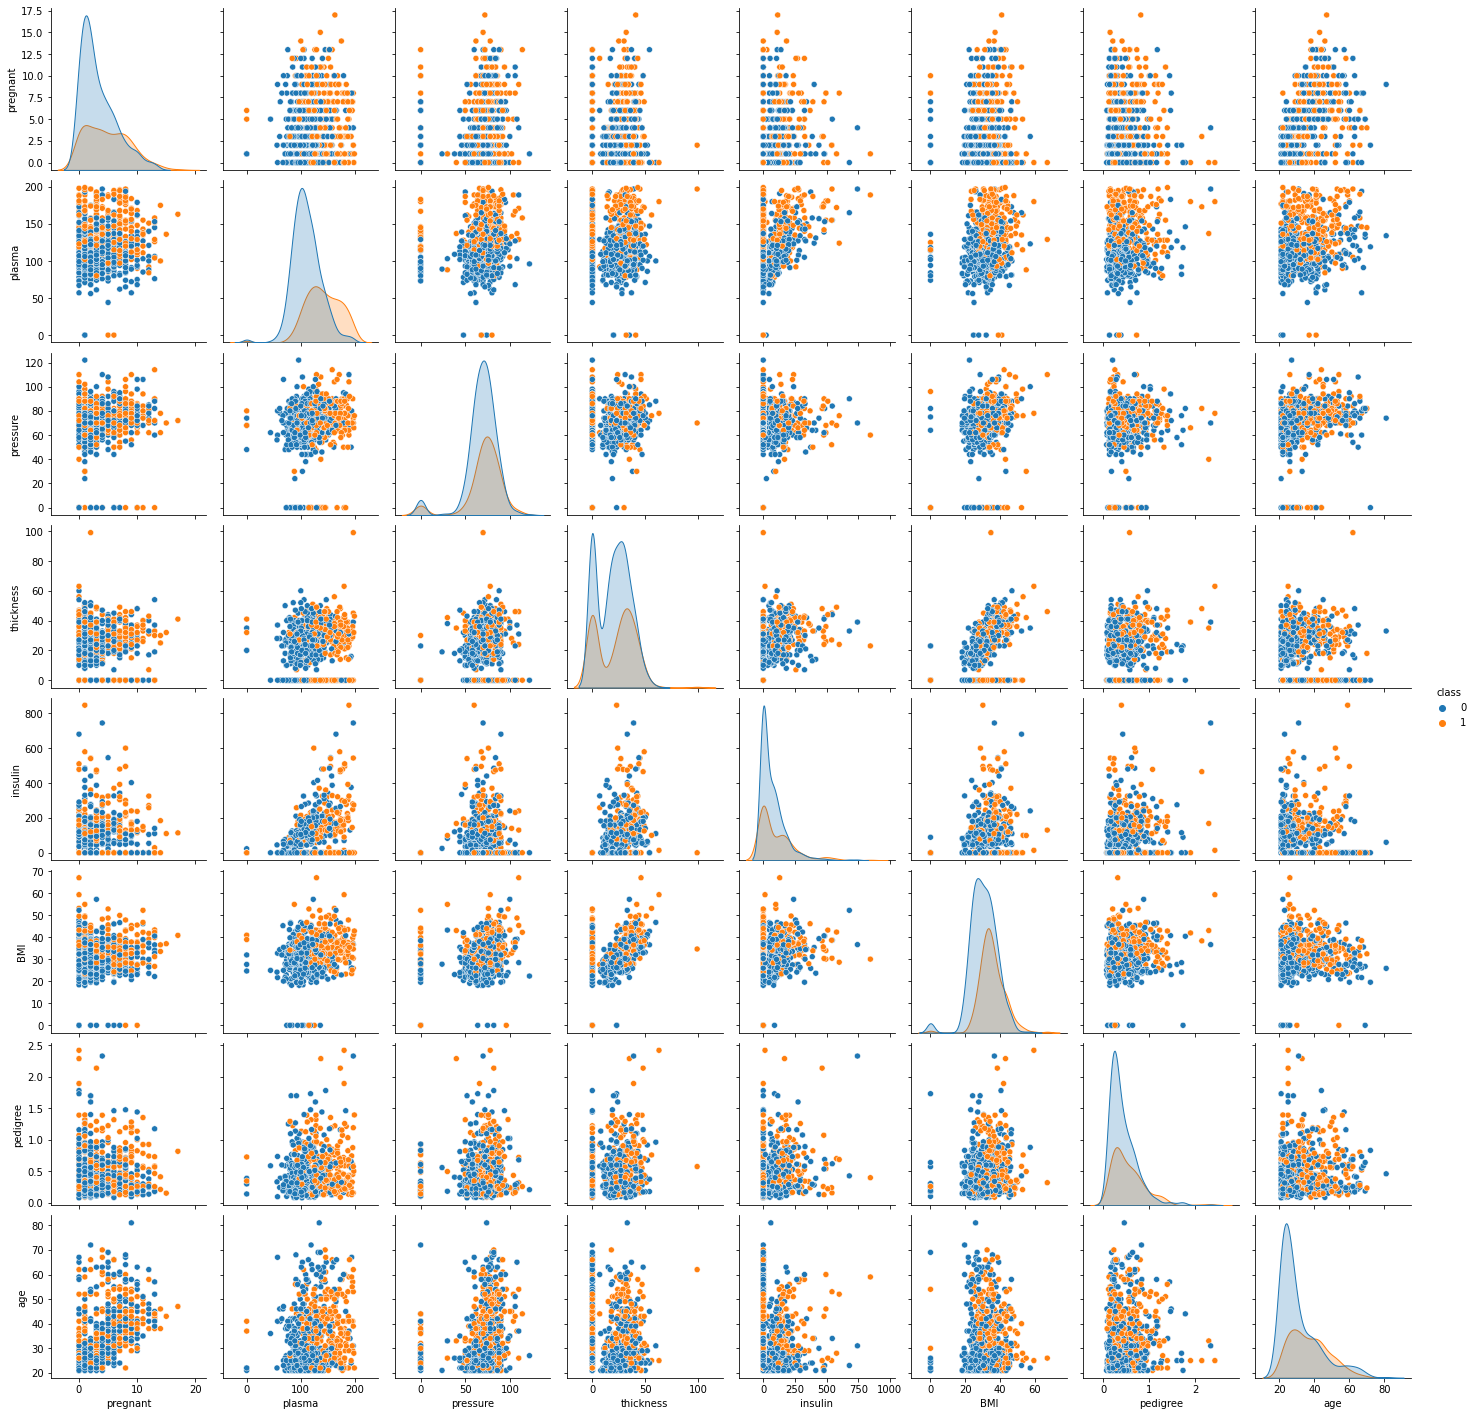

In [31]:
sns.pairplot(df, hue='class');
plt.show()

In [32]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)

# 피마 인디언의 당뇨병 정보를 불러들입니다.
dataset = np.loadtxt('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/ThoraricSurgery.csv', delimiter=",")

# 피마 인디언의 당뇨병 정보를 X와 Y로 구분하여 저장합니다.
X = dataset[:,0:8]
y = dataset[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. 더 좋은 분류기 생성
* `get_myStacking()`를 수정해서 판별기의 성능을 올려보자.
* 필요하다면 `get_myModels()`에 모델을 추가할 수도 있다.

In [283]:
def get_myModels(r_state=42, n_est=50, lr=0.1):
    models = dict()
    models['logistic-regression'] = LogisticRegression(solver="lbfgs", random_state=42)
    models['GaussianNB'] = GaussianNB()
    models['sgd'] = SGDClassifier(loss="hinge", learning_rate="constant", 
                                 eta0=0.001, max_iter=10000, tol=1e-3, 
                                 random_state=r_state)
    models['dcision-tree'] = DecisionTreeClassifier(random_state=r_state)
    models['random-forest'] = RandomForestClassifier(
                                          random_state=r_state)
    

    # hard-vote / soft-vote에서 estimators를 추가하거나 제거해도 됩니다.
    models['hard-vote'] = VotingClassifier(
        estimators=[ 
                    ('random-forest', models['random-forest']), 
                    ],
        voting='hard')
    models['soft-vote'] = VotingClassifier(
        estimators=[('logistic-regression', models['logistic-regression']),
                    ('random-forest', models['random-forest']), 
                    ("svm_clf", SVC(gamma="scale", probability=True, random_state=r_state))],
        voting='soft')
    
    models['Bagging'] = BaggingClassifier(
        DecisionTreeClassifier(random_state=r_state), n_estimators=n_est,
        bootstrap=True, random_state=r_state)
    models['adaBoosting'] = AdaBoostClassifier(
        DecisionTreeClassifier(random_state=r_state), n_estimators=n_est,
        algorithm="SAMME.R", learning_rate=lr, random_state=r_state)
    models['gradientBoosting'] = GradientBoostingClassifier(
        random_state=r_state)

    return models

def get_myStacking(models, nfold=5):
    layer0 = list() 
    # 원하는 모델을 쌓아보세요 
    # e.g. layer0.append((string, model))
    layer0.append(('random-forest', models['random-forest']))
    layer0.append(('gradientBoosting', models['gradientBoosting']))
    layer0.append(('Bagging', models['Bagging']))
  
    # 마지막 판별기 역시 원하는 모델로 바꿔보세요
    layer1 = LogisticRegression()
    
    model = StackingClassifier(estimators=layer0,
                              final_estimator=layer1,
                              cv=nfold)
    return model

In [284]:
new_models = get_myModels()

results, names, times = list(), list(), list()
for name, model in new_models.items():
    acc, elaptime = evaluate_model(model, X_train, X_test, 
                                   y_train, y_test)
    results.append(acc)
    times.append(elaptime)
    names.append(name)
    print('%20s\t %.4f (time: %.3f)' % (name, acc, elaptime))

 logistic-regression	 0.8420 (time: 0.005)
          GaussianNB	 0.8433 (time: 0.001)
                 sgd	 0.8413 (time: 0.003)
        dcision-tree	 0.8680 (time: 0.004)
       random-forest	 0.8967 (time: 0.267)
           hard-vote	 0.8967 (time: 0.280)
           soft-vote	 0.9000 (time: 0.495)
             Bagging	 0.8927 (time: 0.189)
         adaBoosting	 0.8660 (time: 0.007)
    gradientBoosting	 0.9080 (time: 0.188)


In [285]:
new_models = get_myModels()

modelstack = dict()
modelstack['stack'] = get_myStacking(new_models)

results, names, times = list(), list(), list()
for name, model in modelstack.items():
    acc, elaptime = evaluate_model(model, X_train, X_test, 
                                   y_train, y_test)
    results.append(acc)
    times.append(elaptime)
    names.append(name)
    print('%s\t %.4f (time: %.3f)' % (name, acc, elaptime))

stack	 0.9113 (time: 3.327)
